# Task 1

The structure of an encoder block in the Transformer has two main components: Multi-Head Self-Attention and the Feed-Forward Network.

## Multi-Head Self-Attention

Each attention head has its own Q, K and V projection matrices. The size of each is $d_k \times (d_k/h)$. Since there are h heads, and 3 projection matrices, the total parametres for Q, K, and V is $3 \times h \times d_k \times (d_k/h) = 3d^2_k$. The final linear layer projects the combined vector back to $d_k \implies$ size = $d_k \times d_k = d^2_k \implies$ the total parameters for this output projection is $d^2_k \therefore$ the total for Multi-Head Attention is $3 \times d^2_k + d^2_k = 4d^2_k$

## Feed-Forward Network

For each layer, the input dimension is $d_k$ and the output dimension is $4d_k \implies$ the number of parameters for each layer is $4d^2_k$. Since there are two layers, the total for the Feed-Forward Network is $2 * 4d^2_k = 8d^2_k$

## Maximum number of words: $m$

$m$ affects the sequence length that the transformer can process, but doesn't impact the architecture itself or the number of parameters in each encoder block. Whether the input sequence has $m$ tokens or less, the encoder uses the same set of parameters to process each token individually, so the number of parameters in each encoder block is only a function of $d_k$ and $h$.

## Number of trainable parameters in each encoder block of the transformer model

Multi-Head Attention + Feed-Forward Network = $4d^2_k + 8d^2_k = 12d^2_k$

# Task 2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


species
oryx gazella                219
tragelaphus oryx             89
antidorcas marsupialis       78
tragelaphus strepsiceros     57
equus zebra                  42
alcelaphus buselaphus        24
lupulella mesomelas          15
struthio camelus             12
raphicerus campestris         9
ardeotis kori                 6
panthera leo                  6
chlorocebus pygerythrus       3
connochaetes taurinus         3
Name: count, dtype: int64
Total images: 1000
Unique species: 13


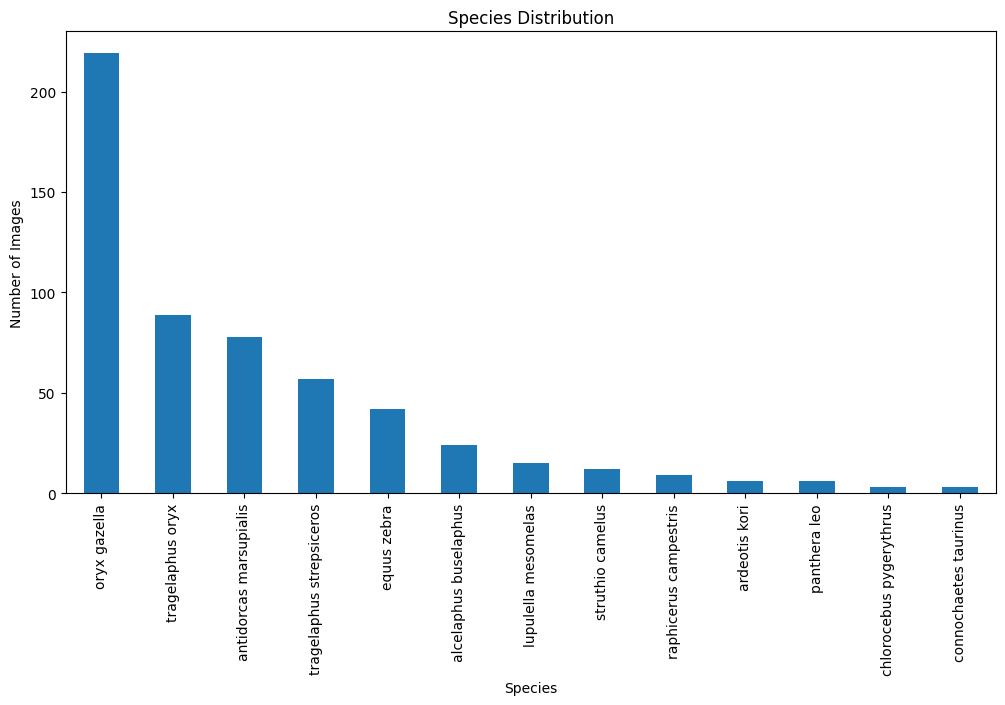

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

metadata_path = '/content/drive/MyDrive/AI4C/HW4/metadata.csv'
df = pd.read_csv(metadata_path)

species_counts = df['species'].value_counts()
print(species_counts)

total_images = len(df)
unique_species = df['species'].nunique()
print(f'Total images: {total_images}')
print(f'Unique species: {unique_species}')

species_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.show()

KAR_S1_B01_R1_IMAG4914.JPG: size = (648, 500), mode = RGB
KAR_S1_A02_R1_IMAG0291.JPG: size = (648, 500), mode = RGB
KAR_S1_A02_R1_IMAG0386.JPG: size = (648, 500), mode = RGB
KAR_S1_A02_R1_IMAG0460.JPG: size = (648, 500), mode = RGB
KAR_S1_B01_R1_IMAG0067.JPG: size = (648, 500), mode = RGB
KAR_S1_B01_R1_IMAG0082.JPG: size = (648, 500), mode = RGB
KAR_S1_B02_R1_IMAG0251.JPG: size = (648, 500), mode = RGB
KAR_S1_B02_R1_IMAG0073.JPG: size = (648, 500), mode = RGB
KAR_S1_B01_R1_IMAG0185.JPG: size = (648, 500), mode = RGB
KAR_S1_A02_R1_IMAG0369.JPG: size = (648, 500), mode = RGB


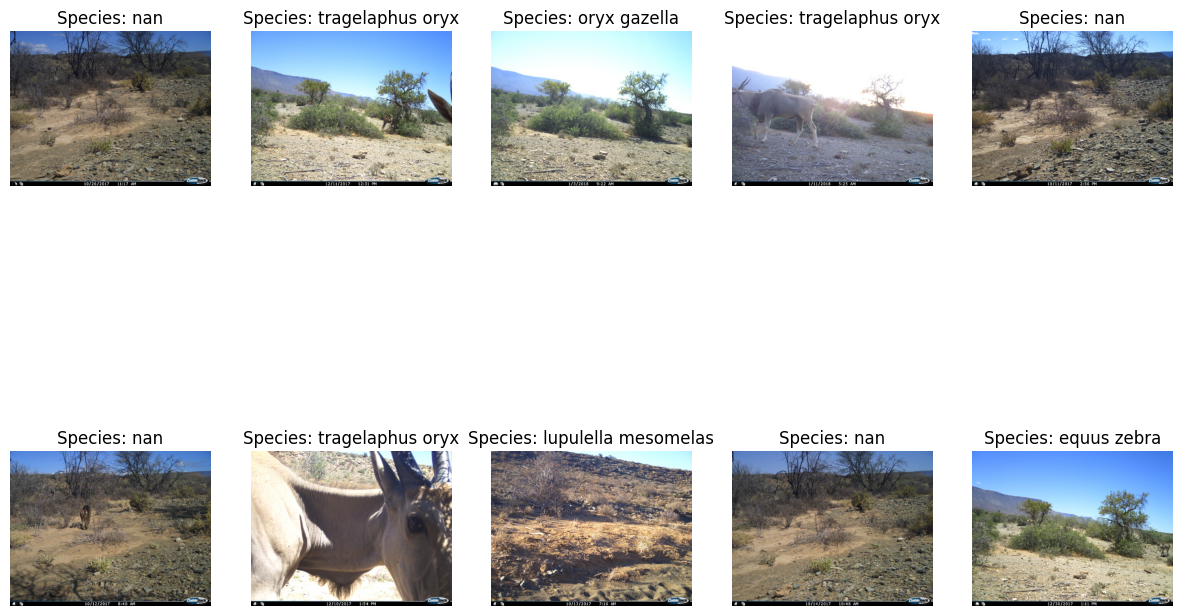

    capture_date_local capture_time_local  subject_id              species  \
520         2017-10-26           11:17:38    28798920                  NaN   
168         2017-12-11           12:31:49    28794896     tragelaphus oryx   
246         2018-01-03           09:22:25    28794929         oryx gazella   
315         2018-01-11           05:25:16    28794955     tragelaphus oryx   
923         2017-10-11           14:56:14    28795025                  NaN   
426         2017-10-12           08:40:16    28795032                  NaN   
747         2017-12-10           13:54:46    28801893     tragelaphus oryx   
600         2017-10-13           07:16:47    28801663  lupulella mesomelas   
983         2017-10-14           10:48:23    28795093                  NaN   
234         2017-12-30           13:11:07    28794922          equus zebra   

             common_name  
520               baboon  
168                eland  
246              gemsbok  
315                eland  
923   

In [13]:
import random
from PIL import Image
import urllib.parse
import os

sample_images = df.sample(10)

plt.figure(figsize=(15, 10))

for i, row in enumerate(sample_images.itertuples(), 1):
  img_path = f"/content/drive/MyDrive/AI4C/HW4/images/{row.image_basename}"
  with Image.open(img_path) as img:
    print(f"{row.image_basename}: size = {img.size}, mode = {img.mode}")
  img = Image.open(img_path)
  plt.subplot(2, 5, i)
  plt.imshow(img)
  plt.title(f'Species: {row.species}')
  plt.axis('off')
plt.show()

print(sample_images[['capture_date_local', 'capture_time_local', 'subject_id', 'species', 'common_name']])

In [10]:
total_images = len(df)
empty_images_count = len(df[df['question__species'] == 'blank'])

empty_proportion = empty_images_count / total_images
print(f"Empty images: {empty_images_count}")
print(f"Proportion of empty images: {empty_proportion}")

Empty images: 218
Proportion of empty images: 0.218


The biggest issues that I uncovered from my EDA are the species class imbalance within the dataset based on the plot of unique species vs. their counts and the fact that 21.8% of the images are blank.
